## **Sparse and Denoising Autoencoders**

#### **Sparse Autoencoders**

To avoid overfitting and large reconstructions you need to cause sparsity in the networks. Inducing sparsity just means zeroing out weights so that the connections learned are stronger.

Ideas:

* Dropout layers: can induce sparsity. Recommended to include dropout layers in the encoder part of the AE.
* activity regularizers: they add a constraint (penalty) to the loss function so that some weights are zeroed. You can use L1 or L2 penalties.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

## load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
## Flatten images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [4]:
## make the image 0-1 standardized
X_train = X_train/255
X_test = X_test/255

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
import tensorflow as tf

## NN architecture

## input layer
input_img = Input(shape=(784,))

## encoder
## encoder = Dense(100, activation = "relu", activity_regularizer = l1(0.001))(input_img)
encoder = Dense(100, activation = "relu")(input_img)
encoder = Dropout(0.2)(encoder)  ## randomly produces sparsity (smaller problems)
## latent
latent = Dense(36, activation = "relu")(encoder)
## decoder
decoder = Dense(100, activation = "relu")(latent)
## output layer
output_img = Dense(784, activation = "sigmoid")(decoder)

In [5]:
## combined model
AE = Model(input_img, output_img)
## encoder model
encoder_model = Model(input_img, latent) ## 36 pixels

In [6]:
## summary of AE
AE.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           3,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           3,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          79,184 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,020 (644.61 KB)

 Trainable params: 165,020 (644.61 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
## encoder_model summary
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           3,636 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,136 (320.84 KB)

 Trainable params: 82,136 (320.84 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
## compile
AE.compile(optimizer = "adam", loss = "mse")

In [9]:
## Train
AE.fit(X_train, X_train,
       epochs = 50,
       batch_size = 256,
       shuffle = True,
       validation_data = (X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0932 - val_loss: 0.0349
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0353 - val_loss: 0.0250
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0282 - val_loss: 0.0211
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0252 - val_loss: 0.0184
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0231 - val_loss: 0.0166
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0216 - val_loss: 0.0154
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0207 - val_loss: 0.0145
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0200 - val_loss: 0.0139
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0194 - val_loss: 0.0133
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0190 - val_loss: 0.0130
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186 - val_loss: 0.0127
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

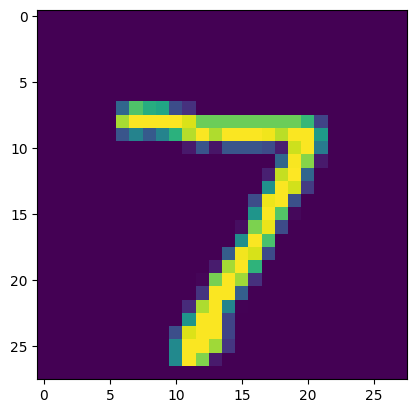

In [10]:
## image of X_test
plt.imshow(X_test[0].reshape(28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


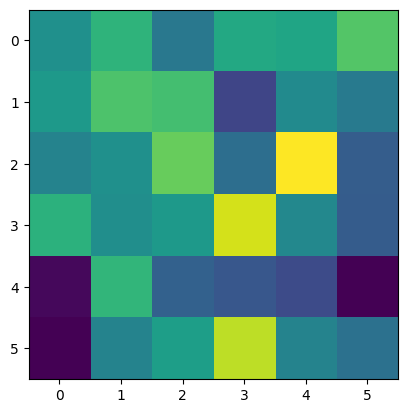

In [11]:
## image of bottleneck 6x6
## We can understand the distribution of the bottleneck
## and generate FAKE pixels that are close
## if pixel 1 has a mean = 150, std = 10
## variation autoencoder can generate fake data that looks real
plt.imshow(encoder_model.predict(X_test[0].reshape(1,784)).reshape(6,6))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


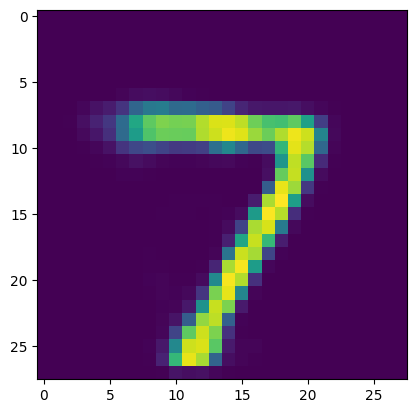

In [12]:
## reconstructed image
plt.imshow(AE.predict(X_test[0].reshape(1,784)).reshape(28,28))

#### **Denoising Autoencoder**

Mostly used in image improvements. The idea to create fake noise and then train on .fit(X_noise, X_clean).

In [13]:
## Example of fake image noise
noise = 0.2
X_train_noise = X_train + noise * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_test_noise = X_test + noise * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)
X_train_noise = np.clip(X_train_noise, 0., 1.)
X_test_noise = np.clip(X_test_noise, 0., 1.)

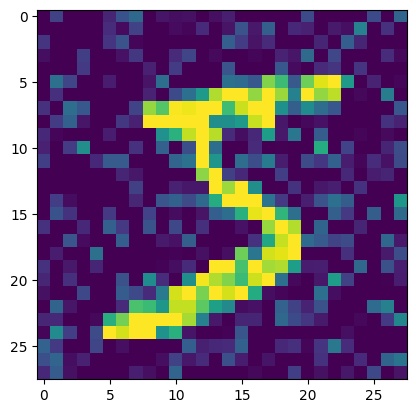

In [14]:
## example of fake noise
plt.imshow(X_train_noise[0].reshape(28,28))

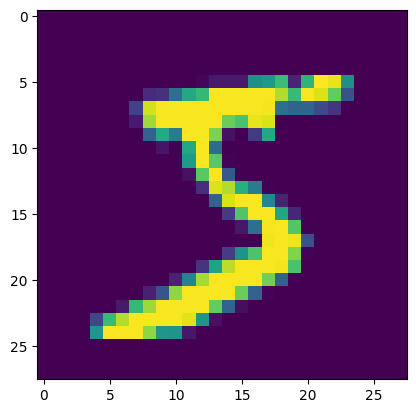

In [15]:
plt.imshow(X_train[0].reshape(28,28))

In [16]:
## Train
## Denoising just changes .fit(X_train_noise, X_train)
AE.fit(X_train_noise, X_train,
       epochs = 50,
       batch_size = 256,
       shuffle = True,
       validation_data = (X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164 - val_loss: 0.0096
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - val_loss: 0.0098
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - val_loss: 0.0098
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0154 - val_loss: 0.0099
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0154 - val_loss: 0.0097
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0153 - val_loss: 0.0098
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0100
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0101
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0100
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0100
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0100
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

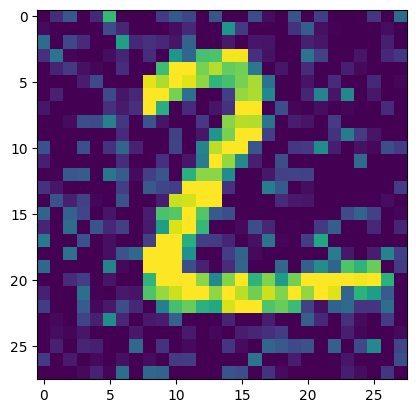

In [17]:
## plot image 1 test
plt.imshow(X_test_noise[1].reshape(28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


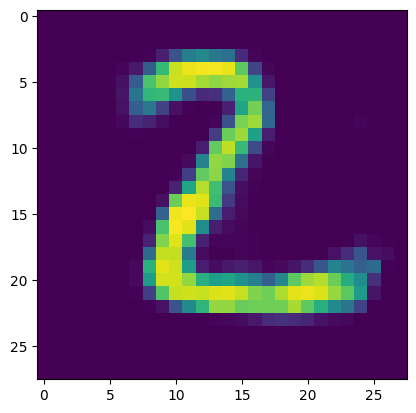

In [18]:
## plot image of reconstructed noise image
plt.imshow(AE.predict(X_test_noise[1].reshape(1,784)).reshape(28,28))

## **Convolutional Neural Networks**

We can't use feed-forward architectures on big, color images. They are overparameterized and suffer from invariances (change size, move, ...). Instead, we use an architecture that can extract information images.

E.g., 32x32x3. cifar10. Classification dataset

In [19]:
## load the cifar10 data set
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [20]:
## training set
X_train.shape

(50000, 32, 32, 3)

In [27]:
## 0-1 standardization
X_train = X_train/255
X_test = X_test/255

## **Fitting a Feed-Forward Architecture**

* Images need to be centered. E.g., a truck needs to be centered in the image, nothing else beside
* Too many weights and biases (flattening)

In [28]:
32*32*3

3072

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

## NN Architecture
model = Sequential()  ## empty
## model.add(Input(shape = (32,32,3))
model.add(Flatten(input_shape = (32,32,3)))  ## flattening (works as input to Dense)
model.add(Dense(128, activation = "relu"))   ## hidden 1
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))    ## hidden 2
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))    ## hidden 3
model.add(Dense(10, activation = "softmax")) ## output layer (multi-class)

In [40]:
## summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,010 (1.54 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
## compile (sparse b/c y = [0, 1, 2, 3,...])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [33]:
## fit
model.fit(X_train, y_train, epochs = 50, batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2112 - loss: 2.1741 - val_accuracy: 0.3370 - val_loss: 1.8941
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3026 - loss: 1.9152 - val_accuracy: 0.3453 - val_loss: 1.8521
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3199 - loss: 1.8762 - val_accuracy: 0.3688 - val_loss: 1.7793
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3260 - loss: 1.8469 - val_accuracy: 0.3709 - val_loss: 1.7534
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3382 - loss: 1.8227 - val_accuracy: 0.3826 - val_loss: 1.7267
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3419 - loss: 1.8071 - val_accuracy: 0.3894 - val_loss: 1.7170
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3521 - loss: 1.7817 - val_accuracy: 0.3853 - val_loss: 1.7241
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3534 - loss: 1.7887 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


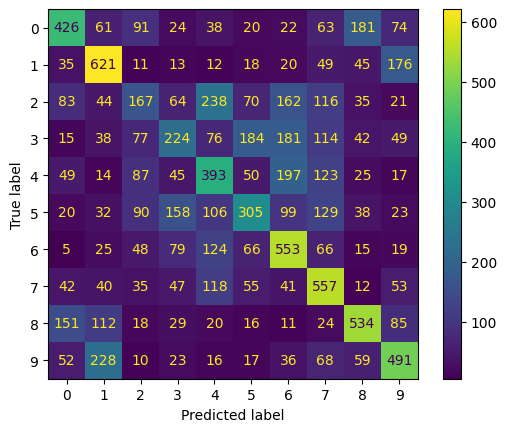

In [34]:
## confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1) ## highest prob of multi-class

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [35]:
## accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4271

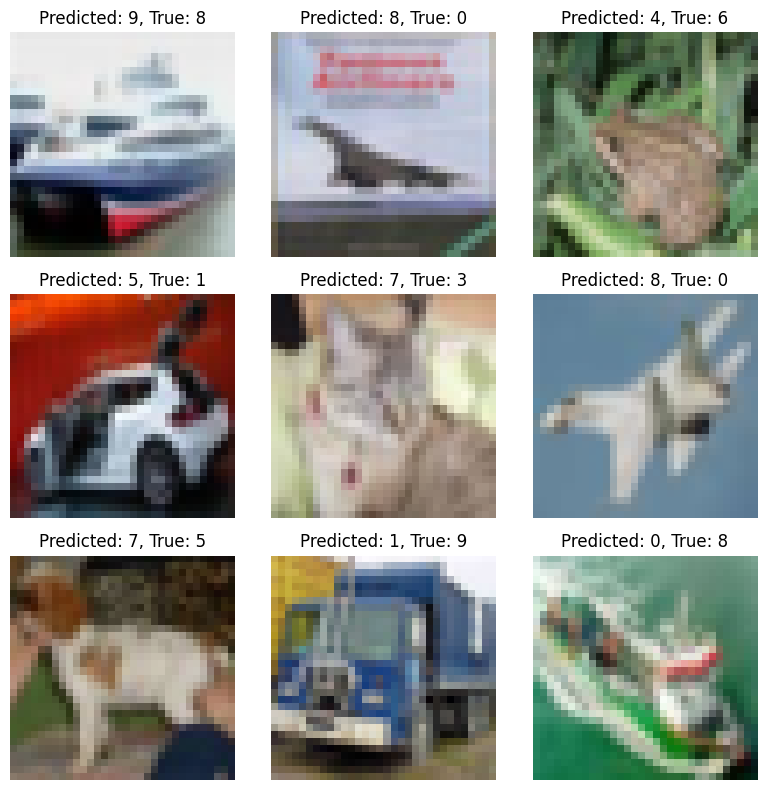

In [36]:
# prompt: plot images of bad predictions

import matplotlib.pyplot as plt

# Assuming y_pred and y_test are defined from the previous code
# and that X_test contains the image data

# Find indices of incorrect predictions
incorrect_indices = np.where(y_pred != y_test.flatten())[0]

# Plot the first 9 incorrect predictions
num_plots = min(9, len(incorrect_indices))
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < num_plots:
        index = incorrect_indices[i]
        ax.imshow(X_test[index])
        ax.set_title(f"Predicted: {y_pred[index]}, True: {y_test[index][0]}")
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()
